In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pylab as pl
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-white')

/home/jupyter-lbg/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [2]:
data = pd.read_csv('data/20142018_whole.csv', usecols=list(range(1,14)))
data = data.dropna()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41108 entries, 0 to 42538
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   41108 non-null  object 
 1   windspeed              41108 non-null  float64
 2   winddirection          41108 non-null  float64
 3   GUSTwindspeed          41108 non-null  float64
 4   pressure               41108 non-null  float64
 5   humidity               41108 non-null  float64
 6   temperature            41108 non-null  float64
 7   watertemperature       41108 non-null  float64
 8   maximumwaveheight      41108 non-null  float64
 9   significantwaveheight  41108 non-null  float64
 10  averagewaveheight      41108 non-null  float64
 11  waveperiod             41108 non-null  float64
 12  wavedirection          41108 non-null  float64
dtypes: float64(12), object(1)
memory usage: 4.4+ MB


In [4]:
trainX = data[['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection']]
trainX_ = trainX.values

In [5]:
trainY = data[['windspeed']]
trainY_ = trainY.values

In [6]:
trainX.info()
size=trainX.shape
size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41108 entries, 0 to 42538
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   significantwaveheight  41108 non-null  float64
 1   wavedirection          41108 non-null  float64
 2   waveperiod             41108 non-null  float64
 3   winddirection          41108 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


(41108, 4)

In [7]:
n = size[0]

## Plot Data

In [ ]:
trainX.head()

In [ ]:
trainX.tail()

In [ ]:
trainX_

In [ ]:
n1=int(n/5)
n2 = 1000

In [ ]:
x0 = trainX_[0:n2,0]
x2 = trainX_[0:n2,2]
y = trainY_[0:n2,0]

In [ ]:
pl.figure(figsize=(40, 10))
plt.plot(x0, 'go--', label='sample data 2dplot')
plt.plot(x2, 'r.--', label='sample data 2dplot')
plt.plot(y, 'ko--', linewidth=1, markersize=2, label='sample data 2dplot')
plt.legend()
plt.show()

In [ ]:
x = trainX_[0:n1,0]
y = trainY_[0:n1,0]

In [ ]:
pl.figure()
plt.plot(x, y, 'k.', label='sample data 2dplot')
plt.legend()
plt.show()

In [ ]:
data.iloc[0:10][['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection','windspeed']]

In [ ]:
sns.pairplot(data.iloc[0:n1][['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection','windspeed']]);

## Season 

In [ ]:
year = int(n/5)
startI = 0
endI = int(year/4) + startI

In [ ]:
indices = []
for i in range(5):
    indices.append(range(i*year+startI,i*year+endI))

In [ ]:
spring = np.reshape(indices, (-1))

In [ ]:
spring

In [ ]:
spring.size

In [ ]:
sns.pairplot(data.iloc[spring][['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection','windspeed']]);

## Periodic Shift - winddirection

In [ ]:
#import math

In [ ]:
#data.iloc[0:n2]['winddirection'] = np.sin(data.iloc[0:n2]['winddirection']/360.*math.pi)

In [ ]:
n2 = 1000

In [ ]:
wd = data.iloc[0:n2]['winddirection'].values

In [ ]:
wd

In [ ]:
plt.plot(wd, range(n2), 'ro')
plt.show()

In [ ]:
counts, bins = np.histogram(wd)
plt.hist(bins[:-1], bins, weights=counts)

In [ ]:
wd = wd-180

In [ ]:
wd

In [ ]:
plt.plot(wd, range(n2), 'ro')
plt.show()

In [ ]:
rwd = list(map(lambda x: x+360 if x < 0 else x, wd))

In [ ]:
rwd = np.array(rwd)

In [ ]:
plt.plot(rwd, range(n2), 'ro')
plt.show()

In [ ]:
counts, bins = np.histogram(rwd)
plt.hist(bins[:-1], bins, weights=counts)

## Periodic Shift Wind Direction Data

In [ ]:
# too slow 
# for i in range(n2):
#    if data.iloc[i]['winddirection'] > 360:
#        data.iloc[i]['winddirection'] = data.iloc[i]['winddirection'] - 360

In [ ]:
wd = data.iloc[:]['winddirection']

In [ ]:
wd.shape

In [ ]:
wd = wd-180

In [ ]:
rwd = list(map(lambda x: x+360 if x < 0 else x, wd))

In [ ]:
data.iloc[:]['winddirection'] = rwd

In [ ]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data.iloc[:]['winddirection'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
#plt.text(0, 180, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
sns.pairplot(data.iloc[0:n1][['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection','windspeed']]);

## Simple Linear Regression

In [ ]:
sns.regplot(data.significantwaveheight, data.windspeed, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-1,7)
plt.ylim(ymin=-1);

In [ ]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

# Scale (center the data before scaling & scale the data to unit variance if true)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
X = scale(data.significantwaveheight, with_mean=True, with_std=False).reshape(-1,1)
# X = data.significantwaveheight
y = data.windspeed

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

In [ ]:
data.significantwaveheight.values.reshape(-1)

In [ ]:
m=np.mean(data.significantwaveheight.values.reshape(-1))

In [ ]:
m

In [ ]:
1.7-m

In [ ]:
scale(data.significantwaveheight, with_mean=True, with_std=False)

In [ ]:
y_pred = regr.predict(X)
# Plot outputs
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

## Calculate the rss between y & y_pred

In [ ]:
np.sum((y - y_pred)**2)

## 데이터 정규화

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Model Build

In [8]:
from keras import models
from keras import layers
from keras import losses

In [9]:
def build_model(n):
    model = models.Sequential()
    model.add(layers.Dense(4, activation='softmax', input_shape=(n,))) #relu sigmoid softmax softplus
    model.add(layers.Dense(8, activation='softmax'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) #logcosh mean_squared_error
    return model

## Load Data

In [62]:
data.shape

(41108, 13)

In [63]:
data_ = data[['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection', 'windspeed']]

In [64]:
data_.shape

(41108, 5)

## standardized

In [55]:
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()

In [65]:
# fit scaler on data
scaler.fit(data_)

StandardScaler()

In [69]:
# apply transform
sdata_ = scaler.transform(data_)

In [70]:
# inverse transform
invdata_ = scaler.inverse_transform(sdata_)

In [71]:
data_

,significantwaveheight,wavedirection,waveperiod,winddirection,windspeed
0,1.7,180.0,5.8,312.0,9.3
1,2.2,172.0,6.4,307.0,8.4
2,2.2,187.0,5.8,321.0,7.7
3,2.0,168.0,6.4,331.0,6.0
4,2.1,202.0,7.1,321.0,5.9
...,...,...,...,...,...
42534,0.8,323.0,3.6,10.0,6.5
42535,0.8,316.0,4.6,3.0,6.1
42536,0.9,329.0,4.6,2.0,5.4
42537,0.9,330.0,4.6,9.0,6.1


In [72]:
sdata_

array([[ 1.13494009, -0.18925268,  0.35811801,  1.13322212,  1.39729642],
       [ 1.82350739, -0.28370325,  0.70810391,  1.09092287,  1.10380813],
       [ 1.82350739, -0.10660843,  0.35811801,  1.20936078,  0.87553946],
       ...,
       [ 0.0332324 ,  1.56988922, -0.34185378, -1.48933144,  0.12551382],
       [ 0.0332324 ,  1.58169554, -0.34185378, -1.43011249,  0.35378249],
       [ 0.0332324 ,  1.38098808,  0.06646309,  1.43777673,  0.25595306]])

In [74]:
trainX_ = sdata_[0:n1,[0,2]]
testX_ = sdata_[n1:n,[0,2]]
trainY_ = sdata_[0:n1,4]
testY_ = sdata_[n1:n,4]

In [76]:
n2 = 1000
x0 = trainX_[0:n2,0]
x1 = trainX_[0:n2,1]
y = trainY_[0:n2]

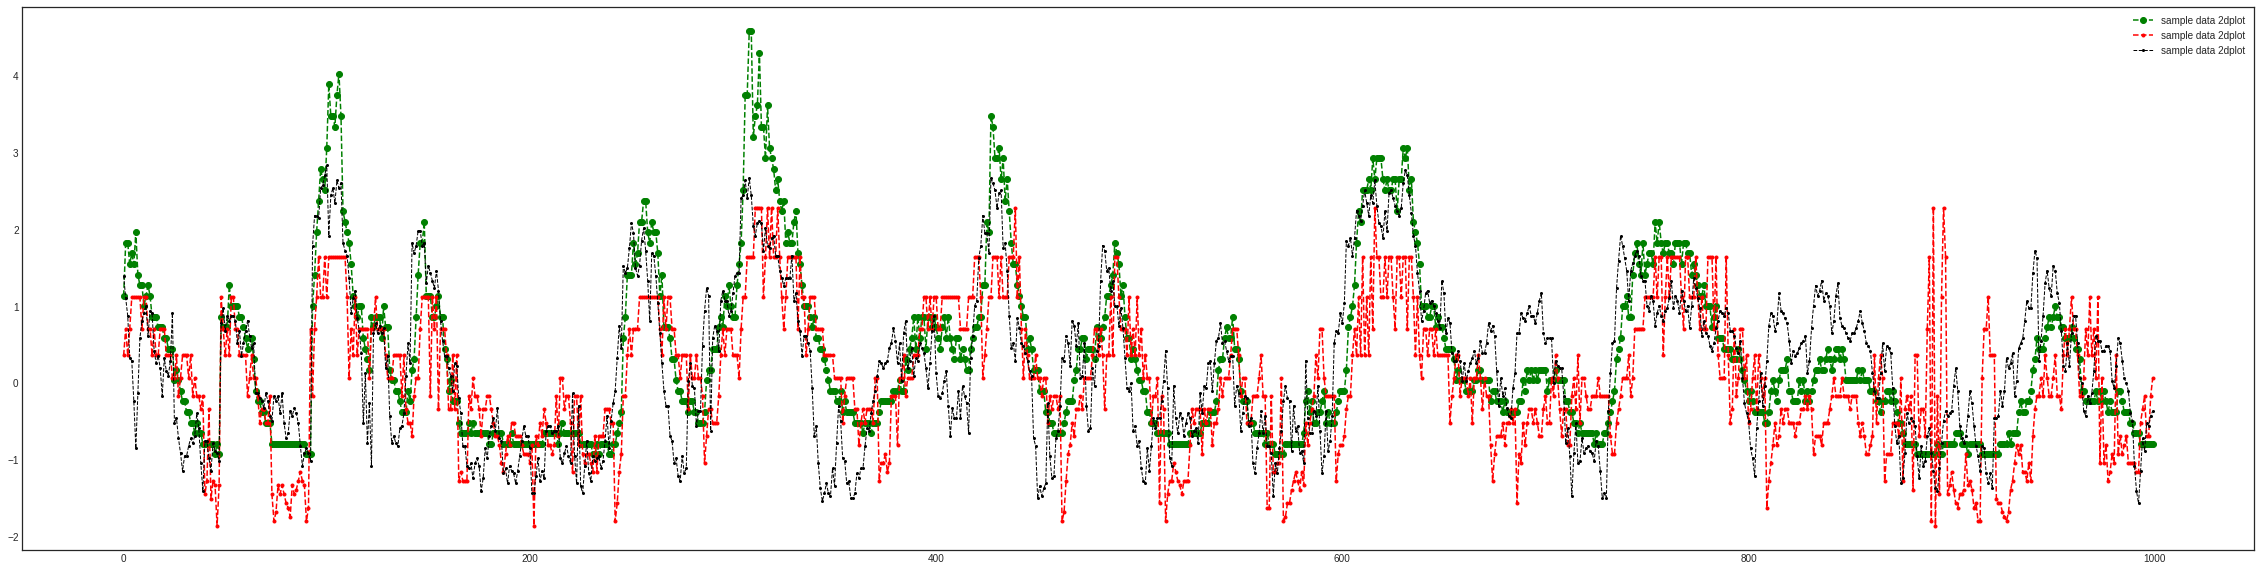

In [77]:
pl.figure(figsize=(40, 10))
plt.plot(x0, 'go--', label='sample data 2dplot')
plt.plot(x1, 'r.--', label='sample data 2dplot')
plt.plot(y, 'ko--', linewidth=1, markersize=2, label='sample data 2dplot')
plt.legend()
plt.show()

## Model Tranning

In [78]:
# 케라스 모델 구성(컴파일 포함)
model = build_model(trainX_.shape[1])

In [79]:
num_epochs = 100
history = model.fit(trainX_, trainY_, epochs = num_epochs) #, batch_size = 1000

Epoch 1/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.8522 - accuracy: 0.0000e+00
Epoch 2/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.3595 - accuracy: 0.0000e+00
Epoch 3/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.3060 - accuracy: 0.0000e+00
Epoch 4/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.3011 - accuracy: 0.0000e+00
Epoch 5/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.2928 - accuracy: 0.0000e+00
Epoch 6/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.2793 - accuracy: 0.0000e+00
Epoch 7/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.2716 - accuracy: 0.0000e+00
Epoch 8/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.2674 - accuracy: 0.0000e+00
Epoch 9/100
1028/1028 [==============================] - 3s 3ms/step - loss: 0.2609 - accuracy: 0.0000e+00
Epoch 10/100
1028/1028 [=============

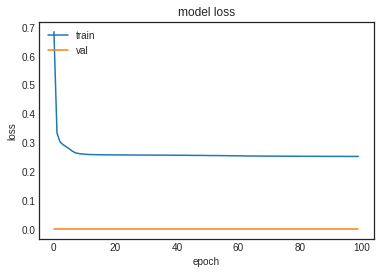

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
MODEL_SAVE_FOLDER_PATH = './model/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)
model_path = MODEL_SAVE_FOLDER_PATH + 'ocean-' + '{epoch:02d}-{val_loss:.4f}.hdf5'
cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
num_epochs = 500
history = model.fit(trainX_, trainY_, validation_data=(testX_, testY_),
    epochs=num_epochs, callbacks=[cb_checkpoint, cb_early_stopping])

In [ ]:
print('\nAccuracy: {:.4f}'.format(model.evaluate(testX_, testY_)[1]))
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Train Data Error

In [81]:
train_mse_score, train_mae_score = model.evaluate(trainX_, trainY_)

1028/1028 [==============================] - 2s 2ms/step - loss: 0.2535 - accuracy: 0.0000e+00


In [82]:
trainY_targets = model.predict(trainX_)

In [83]:
n0 = 0; n1 = 500

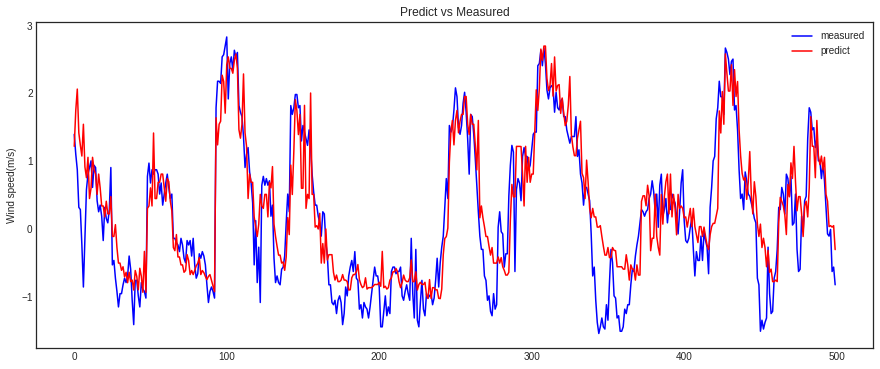

In [84]:
plt.figure(figsize=(15, 6))
plt.plot(trainY_[n0:n0+n1], 'b',label='measured')
plt.plot(trainY_targets[n0:n0+n1],'r',label='predict')
plt.title('Predict vs Measured')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

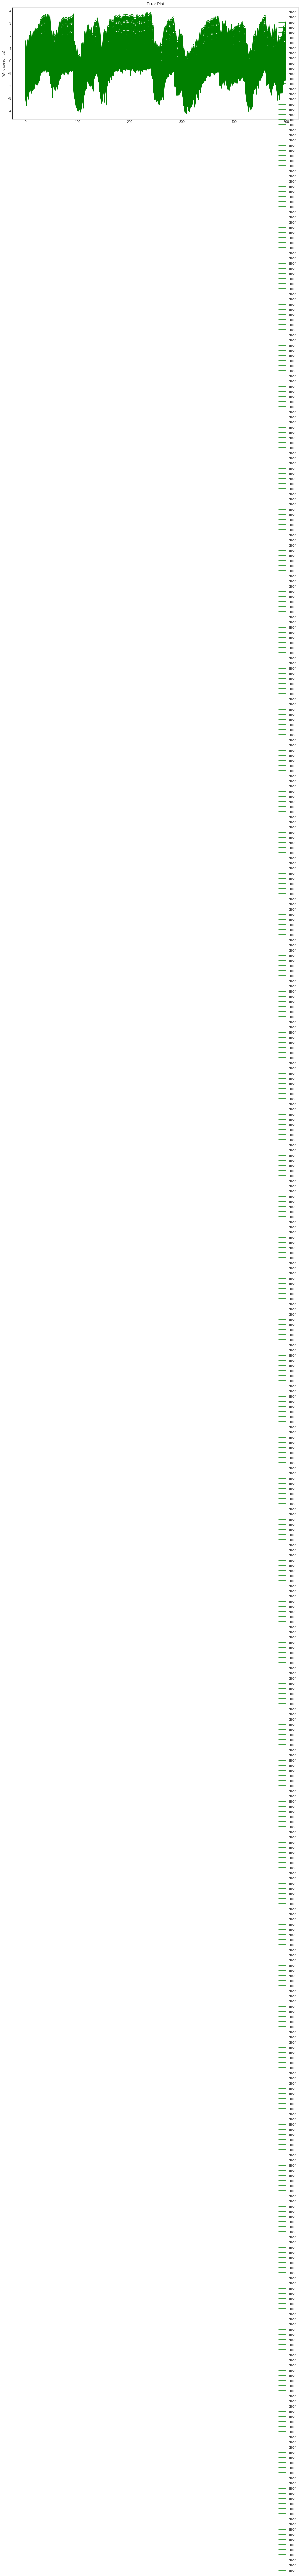

In [85]:
plt.figure(figsize=(15, 6))
plt.plot(trainY_[n0:n0+n1]-trainY_targets[n0:n0+n1], 'g',label='error')
plt.title('Error Plot')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

In [ ]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(layer)
    print(weights, '\n')    

## Test Data

In [ ]:
test_mse_score, test_mae_score = model.evaluate(testX_, testY_)

In [ ]:
testY_targets = model.predict(testX_)

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(testY_[n0:n0+n1], 'b',label='measured')
plt.plot(testY_targets[n0:n0+n1],'r',label='predict')
plt.title('Predict vs Measured')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(trainY_[n0:n0+n1]-trainY_targets[n0:n0+n1], 'g',label='error')
plt.title('Error Plot')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

## 계측값과 예측값의 비교

In [ ]:
predict_targets = model.predict(test_data)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(test_targets, 'b',label='measured')
plt.plot(predict_targets,'r',label='predict')
plt.title('Predict vs Measured')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
predict_targets = predict_targets.flatten()
test_targets = test_targets.flatten()

In [ ]:
np.savetxt('windspeed.txt',(test_targets,predict_targets))

In [ ]:
result_csv = test_csv

In [ ]:
result_csv['풍속예측(m/s)'] = predict_targets

In [ ]:
result_csv.to_csv('result/2019_result_windspeed.csv',encoding='utf-8-sig')

In [ ]:
loss_data = history.history['loss']

In [ ]:
np.savetxt('result/2019_result_windspeed_loss.txt',loss_data)